In [2]:
import pandas as pd


import os
working_directory= os.getcwd()
print(working_directory)

ModuleNotFoundError: No module named 'pandas'

In [1]:
file_path = '/Users/aselvara/Downloads/Iris.csv'
iris_df = pd.read_csv(file_path)

NameError: name 'pd' is not defined

In [52]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [53]:
iris_df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [54]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [55]:
iris_df.isnull().sum() 

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [62]:
label_encoder = LabelEncoder()
iris_df['Species'] = label_encoder.fit_transform(iris_df['Species'])

In [64]:
X = iris_df.drop(columns=['Species', 'Id'])
y = iris_df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [68]:
y_pred = clf.predict(X_test)


In [70]:
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


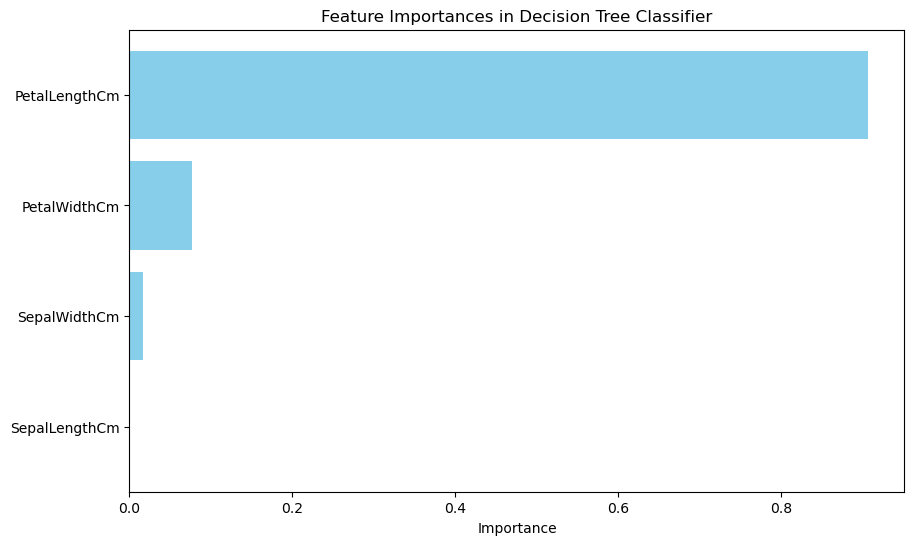


Feature Importances:
         Feature  Importance
2  PetalLengthCm    0.906143
3   PetalWidthCm    0.077186
1   SepalWidthCm    0.016670
0  SepalLengthCm    0.000000


In [72]:
importances = clf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances in Decision Tree Classifier')
plt.gca().invert_yaxis()
plt.show()

print("\nFeature Importances:")
print(importance_df)


In [76]:
from sklearn.preprocessing import LabelEncoder

In [78]:
from sklearn.model_selection import train_test_split

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [84]:
import matplotlib.pyplot as plt

In [95]:

new_flower_df = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X.columns)


predicted_species = clf.predict(new_flower_df)
predicted_species_name = label_encoder.inverse_transform(predicted_species)

print(f'\nPredicted species for the new flower measurements {new_flower_df.values.tolist()[0]}: {predicted_species_name[0]}')




Predicted species for the new flower measurements [5.1, 3.5, 1.4, 0.2]: Iris-setosa
